In [1]:
from math import atan 
from math import log
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

In [2]:
def f(x):
    return 0.65 - 0.75/(1+x**2) - 0.65*x*atan(1/x) if x != 0\
    else float('inf') # because I can't divide by zero, so such f(x) doesn't exist / is not defined

In [3]:
f(0),f(0.5)

(inf, -0.30982333328307937)

# 1.
Minimizing with 4 different methods.

## Exhaustive search

In [45]:
class Exhaustive_search:
    def __init__(self,a,b,n):
        self.a,self.b,self.n = a,b,n
        self.evalF = 0
        
    def F(self,x):
        self.evalF += 1
        return 0.65 - 0.75/(1+x**2) - 0.65*x*atan(1/x) if x != 0\
        else float('inf') # because I can't divide by zero, so such f(x) doesn't exist / is not defined

    def minimum(self):
        a,b,n,F = self.a,self.b,self.n,self.F
        if n == 0:
            return ('({},{})\n{}'.format("%.3f"%a,"%.3f"%b,0))
    
        step = (b-a)/n
        
        if a == 0:
            f2and3 = float('inf')
        else:
            f2and3 = F(a)
            
        x1,x2,x3 = 1,a,a
        f1,f2,f3 = float('inf'), f2and3+1, f2and3
        
        while x3 <= b:
            if f1 >= f2 <= f3 and f2 != float('inf'):
                return ('({},{})\n{}'.format("%.3f"%x1,"%.3f"%x3,self.evalF))#x3-x1
            x1 = x2
            x2 = x3
            x3 = x3 + step
            if x3 == 0:
                x1 = x3+step
                x2 = x1+step
                x3 = x2+step
            f1 = f2
            f2 = f3
            f3 = F(x3)
        return('NO SE ENCONTRÓ')


In [46]:
print(Exhaustive_search(0,3,6000).minimum())

(0.481,0.482)
963


## Division of intervals by half

In [49]:
class Division_by_half:
    def __init__(self,a,b,epsilon):
        self.a,self.b,self.epsilon = a,b,epsilon
        self.evalF = 0
        self.fs = {}
    
    def f(self,x):
        self.evalF += 1
        return 0.65 - 0.75/(1+x**2) - 0.65*x*atan(1/x) if x != 0\
        else float('inf') # because I can't divide by zero, so such f(x) doesn't exist / is not defined
    
    def getf(self,x):
        fs,f = self.fs, self.f
        if x in fs.keys():
            return fs[x]
        else:
            fs[x] = f(x)
            return fs[x]

    

    def minimum(self):
        a,b,epsilon,getf = self.a,self.b,self.epsilon,self.getf
        x_m = (a+b)/2
        L = abs(b-a)
        while L > epsilon:
            x1 = a + L/4
            x2 = b - L/4
            fx1 = getf(x1)
            fx2 = getf(x2)
            fxm = getf(x_m)

            if fx1 < fxm:
                b = x_m
                x_m = x1

            elif fx2 < fxm:
                a = x_m
                x_m = x2

            else:
                a = x1
                b = x2

            L = abs(b-a)

        return ('({},{})\n{}'.format("%.3f"%a,"%.3f"%b,self.evalF))


In [50]:
print(Division_by_half(0,3,0.001).minimum())

(0.480,0.481)
25


## Fibonacci search

In [51]:
class Fibonacci_search:
    def __init__(self,a,b,n):
        self.a,self.b,self.n = a,b,n
        self.evalF = 0
        self.fibo_dict = {}
        self.fs = {}
        
    def fibo_iter_dict(self,n):
        self.fibo_dict[0] = 1
        self.fibo_dict[1] = 1
        if n == 0 or n == 1:
            return self.fibo_dict
        f0 = 1
        f1 = 1
        fn = -1
        for i in range(n-1):
            fn = f0 + f1
            self.fibo_dict[i+2] = fn
            f0 = f1
            f1 = fn
        return self.fibo_dict


    def f(self,x): 
        self.evalF += 1
        self.fs[x] = 0.65 - 0.75/(1+x**2) - 0.65*x*atan(1/x) if x != 0\
        else float('inf') # because I can't divide by zero, so such f(x) doesn't exist / is not defined
        #print(fs[x])
        return self.fs[x]


    def get_f(self,x):
        fs = self.fs
        if x in fs.keys():
            #print(x)
            fx = fs[x]
            #del fs[x]
            return fx
        else:
            fs[x] = self.f(x)
            return fs[x]

    def minimum(self):
        a,b,n = self.a, self.b, self.n
        L = abs(b-a)
        F = self.fibo_iter_dict(n)
        k = 2

        while k <= n:
            #print(1)
            Lks = F[n-k]/F[n]*L
            x1 = a + Lks#round(a + Lks,10)
            x2 = b - Lks#round(b - Lks,10)
            if self.get_f(round(x1,10)) > self.get_f(round(x2,10)):
                a = x1
            else:
                b = x2
            k += 1

        return '({},{})\n{}'.format("%.3f"%a,"%.3f"%b,self.evalF)

In [52]:
print(Fibonacci_search(0,3,20).minimum())

(0.481,0.481)
19


## Golden section search

In [53]:
class Golden_section_search:
    def __init__(self,a,b,epsilon):
        self.a,self.b,self.epsilon = a,b,epsilon
        self.evalF = 0
        self.fs = {}
        
    def f(self,x): 
        self.evalF += 1
        self.fs[x] = 0.65 - 0.75/(1+x**2) - 0.65*x*atan(1/x) if x != 0\
        else float('inf') # because I can't divide by zero, so such f(x) doesn't exist / is not defined
        #print(fs[x])
        return self.fs[x]

    def get_f(self,x):
        fs = self.fs
        if x in fs.keys():
            #print(x)
            fx = fs[x]
            #del fs[x]
            return fx
        else:
            fs[x] = self.f(x)
            return fs[x]

    def minimum(self):
        a,b,epsilon = self.a, self.b, self.epsilon
        w = 0
        aw = 0
        bw = 1
        Lw = 1
        #L = abs(b-a)
        epsilon = epsilon/(b-a)
        #print(self.evalF)
        w1,w2 = 0,0
        go_left, go_right = False, False
        while Lw > epsilon:
            #print(w1,w2)
            if go_right:
                w1 = aw + 0.618*Lw  # right x
            elif go_left:
                w2 = bw - 0.618*Lw  # left x
            else:
                w1 = aw + 0.618*Lw  # right x
                w2 = bw - 0.618*Lw  # left x
               
            #w1 = w1*(b-a)+a
            #w2 = w2*(b-a)+a
            #print(w1*(b-a)+a,w2*(b-a)+a) 
            if self.get_f(w1*(b-a)+a) < self.get_f(w2*(b-a)+a):
                #print(1,self.evalF)
                aw = w2
                go_right = True
                go_left = False
                w2 = w1
            else:
                #print(1,self.evalF)
                bw = w1
                go_right = False
                go_left = True
                w1 = w2
            Lw = bw - aw
            #print(aw,bw)
            #print(Lw)
        return '({},{})\n{}'.format("%.3f"%(aw*(b-a)+a),"%.3f"%(bw*(b-a)+a),self.evalF)

In [54]:
print(Golden_section_search(0,3,0.001).minimum())

(0.480,0.481)
18


# 2.
Validating number of the objective function evaluation on each method.

### Exhaustive search:

The length of the interval ($\epsilon$) is equal to the folowing expression because the whole interval is divided by $n$ making $n$ tiny intervals, but the returned interval is the union of two of those.

$\epsilon = \frac{2(b-a)}{n}$

One has to isolate $n$ in order to get the number of tiny intervals the whole interval needs to be divided in to return an interval of a specific precision.

$n = \frac{2(b-a)}{\epsilon}$

$n$ is the number of needed tiny intervals, and the maximum number of evaluations of $n_{f(x)} = n+1$ because the first tiny interval needs two evaluations, but then you only need to evaluate one time because the start of the next tiny interval is the end of the current interval (hence you only need to evaluate the end of the next interval). 

In [12]:
(2*(3-0)/0.001) + 1

6001.0

### Division of intervals by half

The length of the interval is equal to the following expression because every 2 evaluations the interval length is reduced by $\frac{1}{2}$.

$\left(\frac{1}{2}\right)^\frac{n}{2}L_0 = \epsilon$

Isolating $n$:

$\left(\frac{1}{2}\right)^\frac{n}{2} = \frac{\epsilon}{L_0}$

$\log_\frac{1}{2} \left(\left(\frac{1}{2}\right)^\frac{n}{2}\right) = \log_\frac{1}{2} \left( \frac{\epsilon}{L_0}\right)$

$\frac{n}{2} = \log_\frac{1}{2} \left(\frac{\epsilon}{L_0}\right)$

$n = 2\log_\frac{1}{2} \left(\frac{\epsilon}{L_0}\right)$

In [13]:
2*log(0.001/3-0,1/2)

23.101493570766486

23.1, that means we need 24 for the precision wanted and considering that in the first iteration we evaluate the function 3 times instead of 2, that's **25** evaluations of the objective function.

### Fibonacci search

The interval length is equal to the following expression because the last interval is the one been returned: $\frac{F_{0}}{F_n} = \frac{1}{F_n}$

$\frac{1}{F_n}L = \epsilon$ 

Isolating $n$:

$F_n = \frac{L}{\epsilon}$

$n = n*$ where $n*$ is the minimum fibonacci number that is $>=$ to $F_n$

In [14]:
(3-0)/0.001 # n

3000.0

In [15]:
fibo_dict = Fibonacci_search(0,0,0).fibo_iter_dict(500)
fibo_dict[500] # calculating the first 500 fibonacci numbers

225591516161936330872512695036072072046011324913758190588638866418474627738686883405015987052796968498626

Figuring out $n*$:

In [16]:
n = 0
while True:
    if fibo_dict[n] >= 3000:
        print(n)
        break
    n += 1

18


### Golden section search

The following expression is the interval length because every iteration the interval is reduced by $\tau$ proportion

$\epsilon = \tau^{n-1}*(b-a)$ 

Isolating $n$

$\frac{e}{b-a} = \tau^{n-1}$

$\log_{\tau} \left(\frac{e}{b-a}\right) =\log_{\tau} \tau^{n-1}$

$\log_{\tau} \left(\frac{e}{b-a}\right) = n-1$

$\log_{\tau} \left(\frac{e}{b-a}\right) + 1 = n$

In [17]:
log(0.001/(3-0),0.618)+1

17.636026440155415

Since one can not do 0.636 iterations, the total of iterations is 18.

# 3.
Plotting f(x).

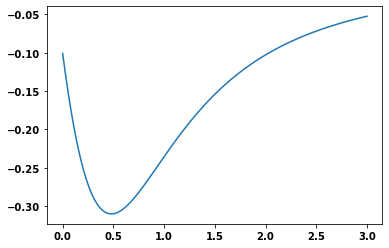

In [18]:
xs = np.arange(0,3,0.001)
xlist = xs
ylist = [f(i) for i in xs]
plt.plot(xlist, ylist)
plt.show()

# 4.
Which method is the most efficient? Why?

##### In this particular problem?

In [55]:
table = [('Exhaustive\n'+str(Exhaustive_search(0,3,6000).minimum())).split('\n'),
        ('Division by half\n'+str(Division_by_half(0,3,0.001).minimum())).split('\n'),
        ('Fibonacci\n'+str(Fibonacci_search(0,3,18).minimum())).split('\n'),
        ('Golden section\n'+str(Golden_section_search(0,3,0.001).minimum())).split('\n')]
headers = ['SEARCH METHOD','INTERVAL','ITERATIONS']
print(tabulate(table,headers=headers,tablefmt="github"))

| SEARCH METHOD    | INTERVAL      |   ITERATIONS |
|------------------|---------------|--------------|
| Exhaustive       | (0.481,0.482) |          963 |
| Division by half | (0.480,0.481) |           25 |
| Fibonacci        | (0.480,0.481) |           17 |
| Golden section   | (0.480,0.481) |           18 |


Even though Fibonacci search has the least amount of evaluations of its objective function, the Golden section search is better because the Fibonacci search has to calculate the fibonnacci sequence (until Fn) once at the beginning and the Golden section search doesn't. The Golden section search only uses the golden number.

##### In general?

Calculating RF(n) for each method:

$Ln_{\textrm{exhaustive}} = \frac{2(b-a)}{n}\\
Ln_{\textrm{division_half}} = \left(\frac{1}{2}\right)^\frac{n}{2}L_0\\
Ln_{\textrm{fibonacci}} = \frac{1}{F_n}L\\ 
Ln_{\textrm{golden_section}} =  \tau^{n-1}*(b-a)$

In [20]:
def Fn(n):
    return Fibonacci_search(0,0,0).fibo_iter_dict(n)[n]
   

def Ln_exh(a,b,n):
    return 2*(b-a)/n
def Ln_div(a,b,n):
    L0 = abs(b-a)
    return (1/2)**(n/2)*L0
def Ln_fib(a,b,n):
    L = abs(b-a)
    return (1/Fn(n))*L
def Ln_gol(a,b,n):
    return 0.618**(n-1)*(b-a)

In [56]:
headers = ['SEARCH METHOD','n = 10','n = 20','n = 30','n = 40','n = 50']
a,b = 0,3 
ns = [10,20,30,40,50]
L0 = 3-0
table = [['Exhaustive']+[Ln_exh(a,b,n)/L0 for n in ns],
         ['Division by half']+[Ln_div(a,b,n)/L0 for n in ns],
         ['Fibonacci']+[Ln_fib(a,b,n)/L0 for n in ns],
         ['Golden section']+[Ln_gol(a,b,n)/L0 for n in ns]]
print('RF(n):')
print(tabulate(table,headers=headers,tablefmt="github"))

RF(n):
| SEARCH METHOD    |    n = 10 |      n = 20 |      n = 30 |      n = 40 |      n = 50 |
|------------------|-----------|-------------|-------------|-------------|-------------|
| Exhaustive       | 0.2       | 0.1         | 0.0666667   | 0.05        | 0.04        |
| Division by half | 0.03125   | 0.000976562 | 3.05176e-05 | 9.53674e-07 | 2.98023e-08 |
| Fibonacci        | 0.011236  | 9.13576e-05 | 7.42794e-07 | 6.03937e-09 | 4.91038e-11 |
| Golden section   | 0.0131491 | 0.000106852 | 8.68292e-07 | 7.05587e-09 | 5.7337e-11  |


The best performance just considering n and the size of the returned interval is Fibonacci search in every measured n, followed by Golden section search by a small margin . But we have to consider that in Fibonacci search we have to calculate Fibonnacci sequence too. For that reason I consider the Golden section search as the best overall.

The worst search method is by far Exhaustive search.